In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import sys,os
sys.path.append(os.path.realpath('..'))

from core.multilabel import MultilabelPredictor

D:\ProgramData\Anaconda3\envs\myenvgpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


successfully load multilabel


In [12]:
#concat data and form dataset
class_train_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/external_test/Oxidation_train_2136_class.csv')
class_test_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/external_test/Oxidation_test_1308_class.csv')
regress_train_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/external_test/Oxidation_train_2136_regress.csv')
regress_test_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/external_test/Oxidation_test_1308_regress.csv')

labels = ['Y/N','Yield']  # which columns to predict based on the others
train_data = class_train_data.copy()
train_data['Yield'] = regress_train_data['Yield']
test_data = class_test_data.copy()
test_data['Yield'] = regress_test_data['Yield']

In [13]:
#train model

problem_types = ['binary','regression']  # type of each prediction problem (optional)
eval_metrics = ['accuracy','mean_absolute_error']  # metrics used to evaluate predictions for each label (optional)
save_path = '../AutogluonModels/multilabel'  # specifies folder to store trained models (optional)

#time_limit = 5  # how many seconds to train the TabularPredictor for each label, set much larger in your applications!

multi_predictor = MultilabelPredictor(labels=labels, problem_types=problem_types, eval_metrics=eval_metrics, path=save_path)
#multi_predictor.fit(train_data, time_limit=time_limit)
multi_predictor.fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "../AutogluonModels/multilabel\Predictor_Y/N\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    2136
Train Data Columns: 105
Label Column: Y/N
Preprocessing data ...
Selected class <--> label mapping:  class 1 = Y, class 0 = N
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Y) vs negative (N) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7553.29 MB
	Train Data (Original)  Memory Usage: 1.79 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

Fitting TabularPredictor for label: Y/N ...


Fitting 13 L1 models ...
Fitting model: KNeighborsUnif ...
	0.9159	 = Validation score   (accuracy)
	0.03s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: KNeighborsDist ...
	0.9206	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...
	0.9486	 = Validation score   (accuracy)
	2.83s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.9439	 = Validation score   (accuracy)
	0.71s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9416	 = Validation score   (accuracy)
	0.61s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9416	 = Validation score   (accuracy)
	0.47s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	0.9509	 = Validation score   (accuracy)
	2.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9416	 = Validation sco

Fitting TabularPredictor for label: Yield ...


	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 40 | ['cat_1_loading', 'add_1_loading', 'add_2_loading', 'add_3_loading', 'Base_loading', ...]
		('int', [])    : 65 | ['ox_loading', '0', '1', '10', '11', ...]
		('object', []) :  1 | ['Y/N']
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 38 | ['cat_1_loading', 'add_1_loading', 'add_2_loading', 'Fast_dis', 'Radius', ...]
		('int', [])       : 52 | ['0', '10', '11', '12', '13', ...]
		('int', ['bool']) : 16 | ['add_3_loading', 'ox_loading', 'Base_loading', 'Y/N', '1', ...]
	0.2s = Fit runtime
	106 features in original data used to generate 106 features in processed data.
	Train Data (Processed) Memory Usage: 1.57 MB (0.0% of available memory)
Data preprocessing and feature engineering runt

MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('../AutogluonModels/multilabel\')


In [15]:
#test model
save_path = '../AutogluonModels/multilabel'    #load_model_path

test_data_nolab = test_data.drop(columns=labels)  # unnecessary, just to demonstrate we're not cheating here
multi_predictor = MultilabelPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained multilabel predictor from file

predictions = multi_predictor.predict(test_data_nolab)

y_test_regress = test_data['Yield']
y_pred_regress = multi_predictor.predict(test_data_nolab)

pd.set_option('display.width',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

y=str(y_pred_regress)
ft = open('output_oxidation_0428_multilable.csv', 'w')
ft.write(y)
ft.close()

print("Predictions:  \n", predictions)
evaluations = multi_predictor.evaluate(test_data)
print(evaluations)
print("Evaluated using metrics:", multi_predictor.eval_metrics)

predictor_regress = multi_predictor.get_predictor('Yield')
leaderborad_train = predictor_regress.leaderboard(test_data,silent=True,extra_metrics=['rmse','mae','r2'])
print(leaderborad_train)
leaderborad_test = predictor_regress.leaderboard(test_data, extra_metrics=['rmse','mae','r2'],silent=True)
print(leaderborad_test)

Predicting with TabularPredictor for label: Y/N ...
Predicting with TabularPredictor for label: Yield ...
Predicting with TabularPredictor for label: Y/N ...
Predicting with TabularPredictor for label: Yield ...


Evaluation: accuracy on test data: 0.7477064220183486
Evaluations on test data:
{
    "accuracy": 0.7477064220183486,
    "balanced_accuracy": 0.7422750376770353,
    "mcc": 0.5213274943125041,
    "roc_auc": 0.8585788971159517,
    "f1": 0.7898089171974524,
    "precision": 0.6919642857142857,
    "recall": 0.9198813056379822
}


Predictions:  
      Y/N     Yield
0      Y  0.175554
1      Y  0.119515
2      Y  0.166037
3      Y  0.155971
4      Y  0.148335
5      Y  0.128183
6      Y  0.153424
7      Y  0.156469
8      Y  0.174152
9      Y  0.114301
10     Y  0.154698
11     Y  0.194874
12     Y  0.143702
13     Y  0.109074
14     Y  0.125604
15     Y  0.194820
16     Y  0.119713
17     Y  0.113856
18     Y  0.155653
19     Y  0.158484
20     Y  0.111511
21     Y  0.176995
22     Y  0.128183
23     Y  0.153424
24     Y  0.240889
25     Y  0.174152
26     Y  0.128183
27     Y  0.140377
28     Y  0.240889
29     Y  0.194874
30     Y  0.144486
31     Y  0.169620
32     N -0.001387
33     Y  0.148413
34     Y  0.201580
35     Y  0.201580
36     Y  0.201379
37     Y  0.201608
38     Y  0.201608
39     Y  0.171147
40     Y  0.210197
41     Y  0.201379
42     Y  0.237687
43     Y  0.545621
44     Y  0.415398
45     Y  0.475528
46     Y  0.546481
47     Y  0.469888
48     Y  0.622259
49     Y  0.642925
50     Y  0.642

Evaluation: mean_absolute_error on test data: -0.07748406372715548
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_absolute_error": -0.07748406372715548,
    "root_mean_squared_error": -0.10125977365651626,
    "mean_squared_error": -0.010253541760968904,
    "r2": 0.6145019292883314,
    "pearsonr": 0.8325894583205294,
    "median_absolute_error": -0.0750147978653698
}


{'Y/N': {'accuracy': 0.7477064220183486, 'balanced_accuracy': 0.7422750376770353, 'mcc': 0.5213274943125041, 'roc_auc': 0.8585788971159517, 'f1': 0.7898089171974524, 'precision': 0.6919642857142857, 'recall': 0.9198813056379822}, 'Yield': {'mean_absolute_error': -0.07748406372715548, 'root_mean_squared_error': -0.10125977365651626, 'mean_squared_error': -0.010253541760968904, 'r2': 0.6145019292883314, 'pearsonr': 0.8325894583205294, 'median_absolute_error': -0.0750147978653698}}
Evaluated using metrics: {'Y/N': 'accuracy', 'Yield': 'mean_absolute_error'}
                  model  score_test  root_mean_squared_error  \
0   WeightedEnsemble_L2   -0.049522                -0.078665   
1              LightGBM   -0.052986                -0.086431   
2       RandomForestMSE   -0.055635                -0.093894   
3         ExtraTreesMSE   -0.055701                -0.092869   
4         LightGBMLarge   -0.058047                -0.090010   
5               XGBoost   -0.059308                -0.0

In [16]:
feature = predictor_regress.feature_importance(test_data)
print(feature)

Computing feature importance via permutation shuffling for 106 features using 1000 rows with 3 shuffle sets...
	87.4s	= Expected runtime (29.13s per shuffle set)
	17.63s	= Actual runtime (Completed 3 of 3 shuffle sets)


                  importance    stddev   p_value  n  p99_high   p99_low
Y/N                 0.066253  0.002712  0.000279  3  0.081792  0.050714
Lengh_3             0.003699  0.000140  0.000239  3  0.004501  0.002897
5                   0.002668  0.000512  0.006036  3  0.005605 -0.000268
E_LOMO              0.002090  0.000679  0.016686  3  0.005978 -0.001798
Ele_ind             0.001976  0.000524  0.011336  3  0.004981 -0.001028
Cav_sur             0.001896  0.000495  0.010990  3  0.004734 -0.000941
61                  0.001427  0.000299  0.007170  3  0.003140 -0.000287
39                  0.001254  0.000261  0.007067  3  0.002749 -0.000242
3_Nuc               0.001039  0.000255  0.009704  3  0.002498 -0.000419
10                  0.000950  0.000152  0.004195  3  0.001819  0.000081
3mulliken_charge    0.000900  0.000308  0.018468  3  0.002665 -0.000866
48                  0.000891  0.000165  0.005646  3  0.001838 -0.000057
3APT_charge         0.000878  0.000553  0.055423  3  0.004049 -0

In [25]:
save_path1 = '../AutogluonModels/multilabel/Predictor_Yield'
predictor = TabularPredictor.load(save_path1)
y_pred = predictor.predict(test_data, model = 'WeightedEnsemble_L2')
data1={'y_true':test_data['Yield'],'y_preds_Yield':y_pred}
pred =  pd.DataFrame(data1)
print(pred)

        y_true  y_preds_Yield
0     0.000000       0.003687
1     0.000000       0.001503
2     0.000000       0.001938
3     0.000000       0.001429
4     0.000000       0.000767
5     0.000000       0.001224
6     0.000000       0.000364
7     0.000000       0.003616
8     0.000000       0.003803
9     0.000000       0.000961
10    0.000000       0.003351
11    0.022878       0.194874
12    0.029348       0.143702
13    0.029930       0.109074
14    0.031842       0.125604
15    0.032154       0.194820
16    0.032330       0.119713
17    0.033192       0.113856
18    0.035735       0.155653
19    0.035804       0.158484
20    0.036159       0.111511
21    0.037666       0.176995
22    0.039203       0.128183
23    0.052099       0.153424
24    0.052392       0.240889
25    0.053626       0.174152
26    0.063587       0.128183
27    0.065700       0.140377
28    0.074461       0.240889
29    0.079261       0.194874
30    0.097939       0.144486
31    0.117391       0.169620
32    0.00

C:\Users\Administrator.DESKTOP-08R43GA\AppData\Local\Temp\ipykernel_30448\2171375859.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


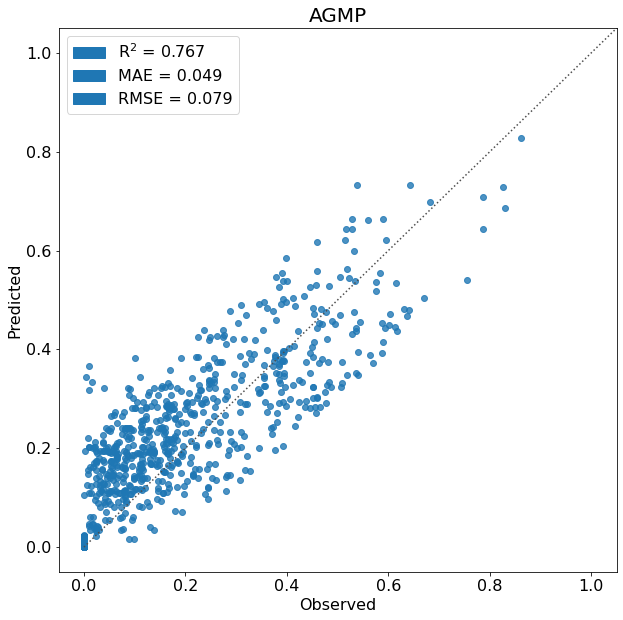

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


def make_plot(y_test, y_pred, rsme, r2_score, mae, name):
    fontsize = 16
    fig, ax = plt.subplots(figsize=(10, 10))
    r2_patch = mpatches.Patch(label="R$^2$ = {:.3f}".format(r2_score), color="#1f77b4")
    mae_patch = mpatches.Patch(label="MAE = {:.3f}".format(mae), color="#1f77b4")
    rmse_patch = mpatches.Patch(label="RMSE = {:.3f}".format(rmse), color="#1f77b4")
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.scatter(y_test, y_pred, alpha=0.8, color="#1f77b4")
    plt.plot(np.arange(100), np.arange(100), ls=':', c=".3")
    plt.legend(handles=[r2_patch,mae_patch,rmse_patch],fontsize=fontsize)
    plt.tick_params(axis='both',which='major',labelsize =16)
    ax.set_ylabel('Predicted', fontsize=fontsize)
    ax.set_xlabel('Observed', fontsize=fontsize)
    ax.set_title(name, fontsize=20)
    return fig

y_true = pred['y_true']
y_preds = pred['y_preds_Yield']
y_preds = np.clip(y_preds, 0, 100)
name = 'AGMP'

r_squared = r2_score(y_true, y_preds)
mae = mean_absolute_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds) ** 0.5


fig = make_plot(y_true, y_preds, rmse, r_squared, mae, name)

fig.show()
fig.savefig('AGMP_test_R2_figure_0705.png')
